In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Passing long-form data and assigning x and y will draw a scatter plot between two variables:

In [9]:
display(tips.total_bill.min(),tips.tip.min())

3.07

1.0

In [11]:
display(tips.total_bill.max(),tips.tip.max())

50.81

10.0

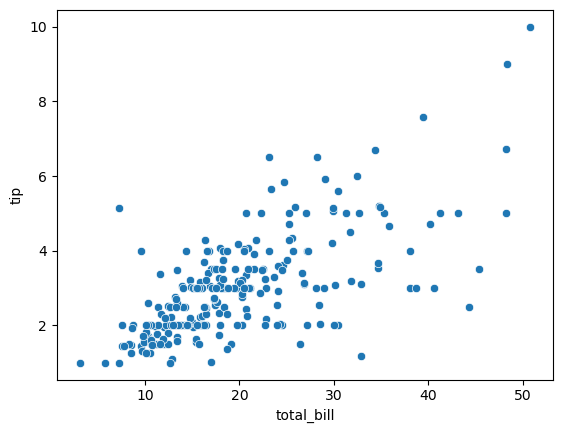

In [4]:
sns.scatterplot(data=tips, x="total_bill", y="tip");

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

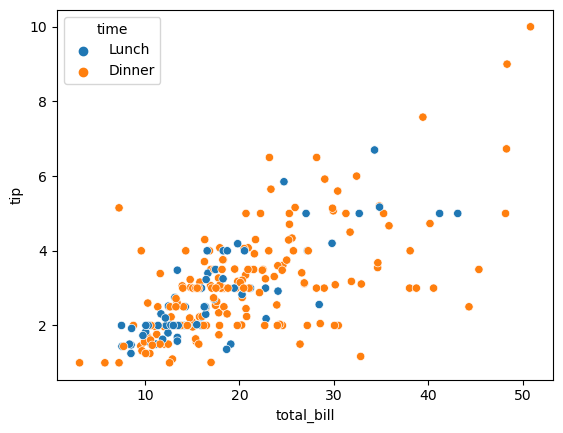

In [12]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")

Assigning the same variable to style will also vary the markers and create a more accessible plot:

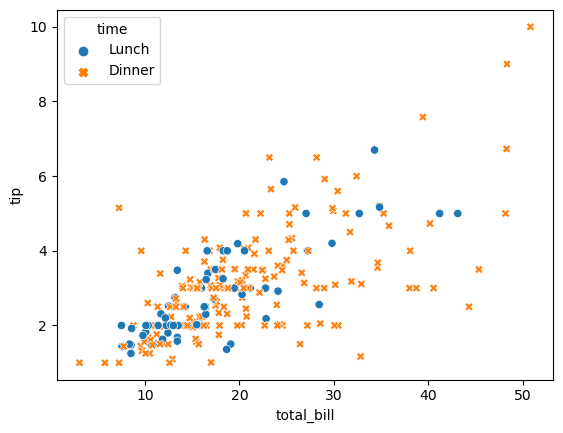

In [14]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", style="time");


Assigning hue and style to different variables will vary colors and markers independently:

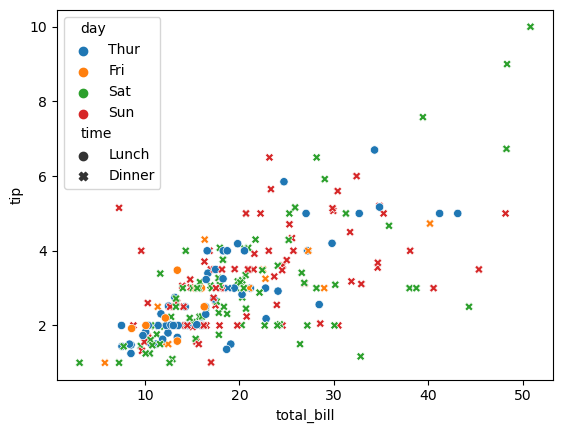

In [16]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", style="time");

If the variable assigned to hue is numeric, the semantic mapping will be quantitative and use a different default palette:

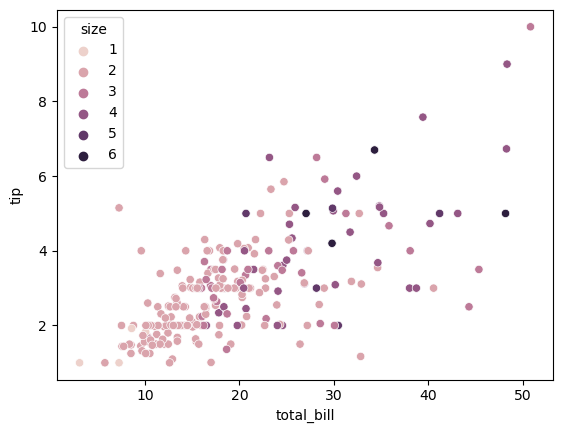

In [18]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size");

Pass the name of a categorical palette or explicit colors (as a Python list of dictionary) to force categorical mapping of the hue variable:

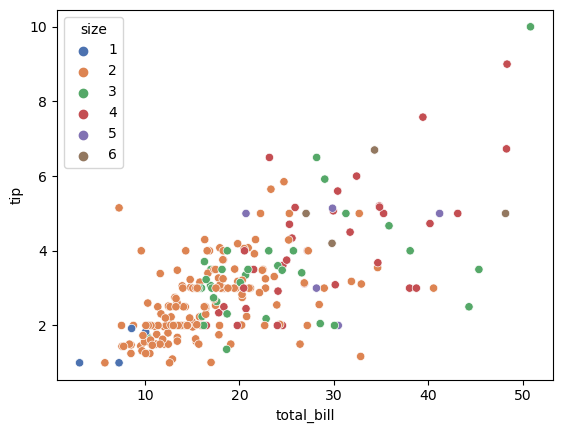

In [20]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size", palette="deep");

If there are a large number of unique numeric values, the legend will show a representative, evenly-spaced set:

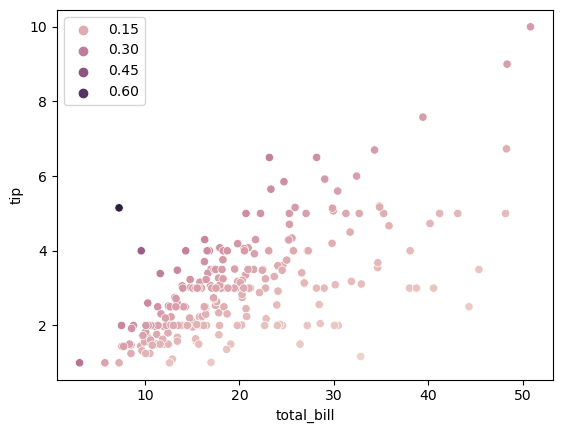

In [23]:
tip_rate = tips.eval("tip / total_bill")
sns.scatterplot(data=tips, x="total_bill", y="tip", hue=tip_rate);

A numeric variable can also be assigned to size to apply a semantic mapping to the areas of the points:

sns.scatte

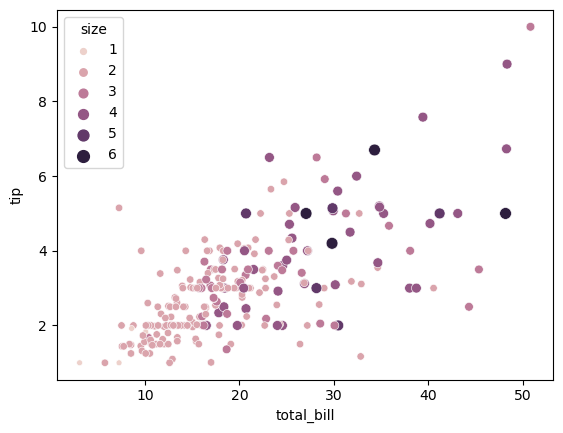

In [25]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size", size="size");


Control the range of marker areas with sizes, and set lengend="full" to force every unique value to appear in the legend:

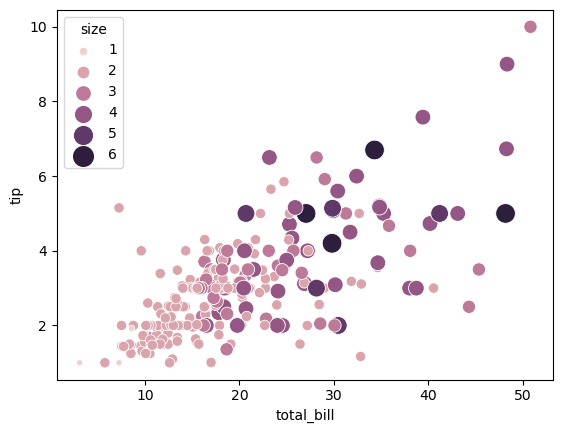

In [27]:
sns.scatterplot(
    data=tips, x="total_bill", y="tip", hue="size", size="size",
    sizes=(20, 200), legend="full"
);

Pass a tuple of values or a matplotlib.colors.Normalize object to hue_norm to control the quantitative hue mapping:

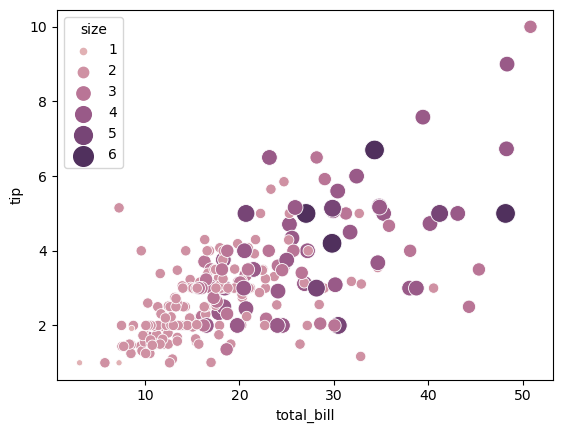

In [28]:
sns.scatterplot(
    data=tips, x="total_bill", y="tip", hue="size", size="size",
    sizes=(20, 200), hue_norm=(0, 7), legend="full"
);

Control the specific markers used to map the style variable by passing a Python list or dictionary of marker codes:

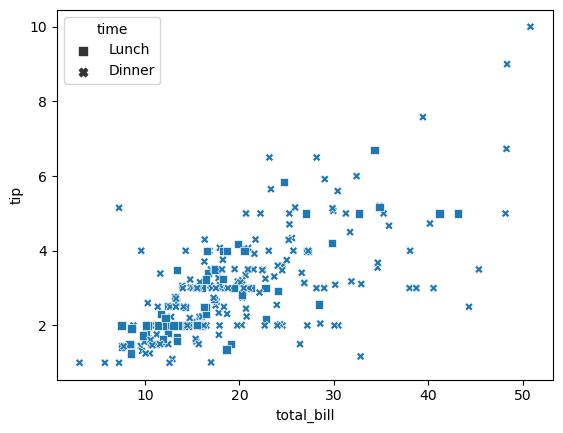

In [30]:
markers = {"Lunch": "s", "Dinner": "X"}
sns.scatterplot(data=tips, x="total_bill", y="tip", style="time", markers=markers);


The previous examples used a long-form dataset. When working with wide-form data, each column will be plotted against its index using both hue and style mapping:



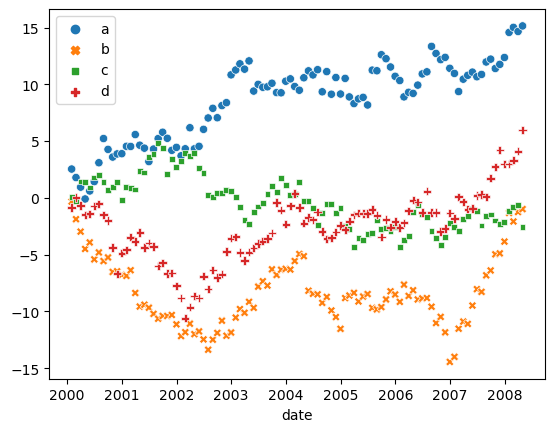

In [32]:
index = pd.date_range("1 1 2000", periods=100, freq="m", name="date")
data = np.random.randn(100, 4).cumsum(axis=0)
wide_df = pd.DataFrame(data, index, ["a", "b", "c", "d"])
sns.scatterplot(data=wide_df);

Use relplot() to combine scatterplot() and FacetGrid. This allows grouping within additional categorical variables, and plotting them across multiple subplots.

Using relplot() is safer than using FacetGrid directly, as it ensures synchronization of the semantic mappings across facets.

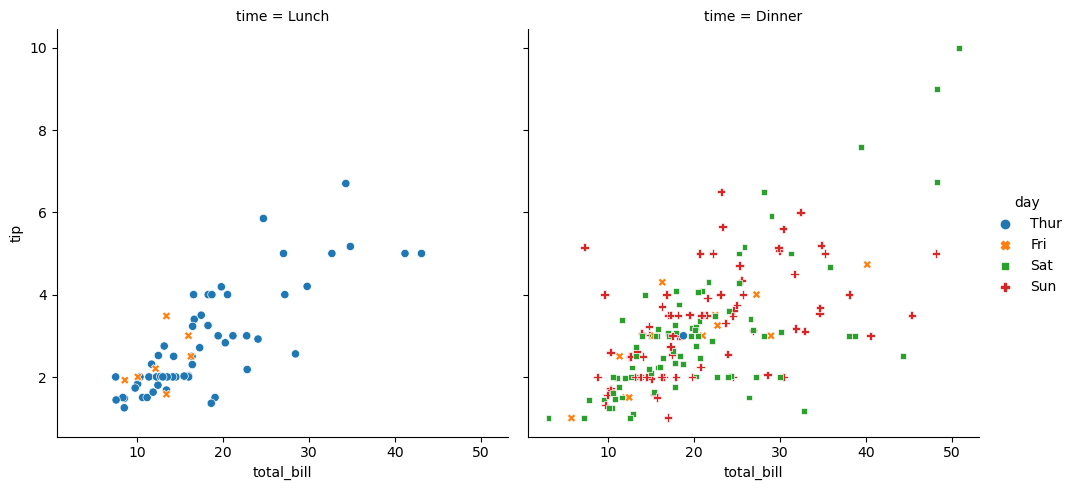

In [34]:
sns.relplot(
    data=tips, x="total_bill", y="tip",
    col="time", hue="day", style="day",
    kind="scatter"
);